In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [8]:
digits = load_digits() # dataset - multiple images of digits (8X8)

In [9]:
print(dir(digits))     # returns list of the various attributes and methods

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [24]:
# digits
print(digits.data[1]) # prints the 2nd image of the dataset as a 1D array

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


<Figure size 432x288 with 0 Axes>

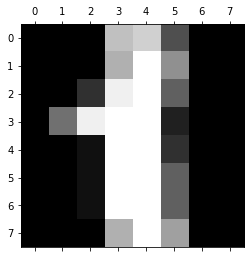

In [20]:
# we will use matplotlib to print the actual images
plt.gray()
plt.matshow(digits.images[1])

AxesImage(43.2,25.92;223.2x223.2)
AxesImage(43.2,25.92;223.2x223.2)
AxesImage(43.2,25.92;223.2x223.2)
AxesImage(43.2,25.92;223.2x223.2)


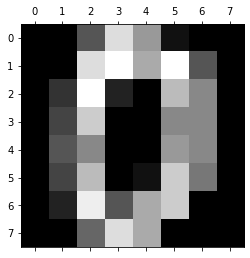

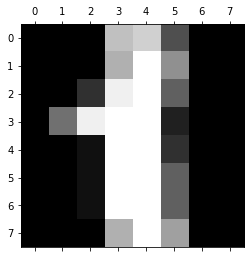

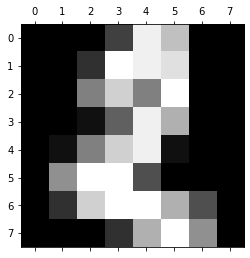

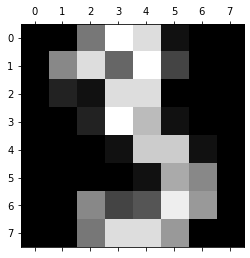

In [73]:
for i in range(4):
  print(plt.matshow(digits.images[i]))

In [74]:
digits.target[0:5] # names of the images 

array([0, 1, 2, 3, 4])

In [75]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(digits.data,digits.target,test_size=0.2) 
# divides the dataframe into a ratio of 2:8

In [76]:
len(xTest)

360

In [77]:
len(xTrain)

1437

In [90]:
from sklearn.linear_model import LogisticRegression
TrainingModel = LogisticRegression()
TrainingModel.fit(xTrain, yTrain) # xTrain= data used for training; yTrain= expected output 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [91]:
print("Accuracy of the model: ")
print(TrainingModel.score(xTest, yTest)*100,"%")

Accuracy of the model: 
96.11111111111111 %


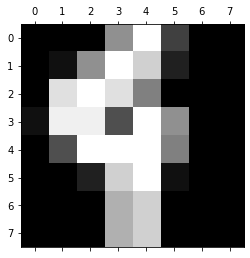

In [92]:
plt.matshow(digits.images[87])

In [93]:
digits.target[87]

4

In [94]:
TrainingModel.predict([digits.data[87]])

array([4])

In [95]:
TrainingModel.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [102]:
# To know where your model does not work:
yPredicted = TrainingModel.predict(xTest)
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(yTest, yPredicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 33,  0,  0],
       [ 0,  2,  1,  0,  0,  1,  1,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 32]])

Text(33.0, 0.5, 'actual values')

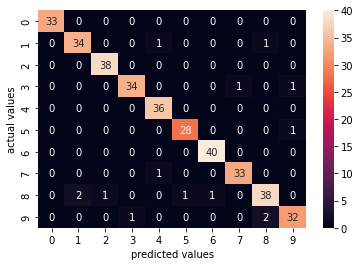

In [108]:
import seaborn as sb
plt.figure()
sb.heatmap(cm, annot=True)
plt.xlabel("predicted values")
plt.ylabel("actual values")

# all the non-diagonal elements except for the ones which show 0, are the wrong predictions.